# Wind Turbine Data

I'm analyzing data from `Kaggle` using tools like `NumPy, Pandas, Matplotlib` and `Seaborn` to find patterns and insights. The dataset has 5 columns and 50530 rows, with no missing values. My goal is to figure out what affects wind turbine power output and find the best conditions for maximum power generation. I'll also look for patterns in wind direction that affect turbine performance.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: azjaja
Your Kaggle Key: ········


100%|██████████| 1.50M/1.50M [00:00<00:00, 28.8MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './wind-turbine-scada-dataset'

In [6]:
import os
os.listdir(data_dir)

['T1.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "turkey-wind-turbine-scada" # change this (use lowercase letters and hyphens only)

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "norwil/turkey-wind-turbine-scada" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/norwil/turkey-wind-turbine-scada


'https://jovian.com/norwil/turkey-wind-turbine-scada'

## Data Preparation and Cleaning

In this stage we will be using `Pandas` library to load and clean the dataset. We will be checking for missing values, along with the shape of the dataset.


In [11]:
import pandas as pd

In [12]:
data_dir = './wind-turbine-scada-dataset'
filename = 'T1.csv'

In [13]:
df = pd.read_csv(os.path.join(data_dir, filename), parse_dates=['Date/Time'])

In [14]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [15]:
df.shape

(50530, 5)

In [16]:
print('The dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset contains 50530 rows and 5 columns


In [17]:
missing_values = df.isna()
print(missing_values.head())

   Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      False                False             False   
1      False                False             False   
2      False                False             False   
3      False                False             False   
4      False                False             False   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                          False               False  
1                          False               False  
2                          False               False  
3                          False               False  
4                          False               False  


In [18]:
missing_values_count = df.isna().sum()
print(missing_values_count)

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64


In [16]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "norwil/turkey-wind-turbine-scada" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/norwil/turkey-wind-turbine-scada


'https://jovian.com/norwil/turkey-wind-turbine-scada'

## Exploratory Analysis and Visualization

In this section an exploratory analysis and visualization techniques have been applied to analyze the wind turbine data.
Firstly, a histogram has been plotted to show the distribution of the `LV ActivePower` column. Secondly, a scatter plot has been used to visualize the correlation between `wind speed` and `LV ActivePower`. Afterwards histogram has been plotted to show the distribution of `wind direction`. Finally, an area plot has been used to show the distribution of `theoretical power` output by `wind speed`

> This section help to uncover insights in data that may not be immediately apparent.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
summary_stats = df.describe()
print(summary_stats)

       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         50530.000000      50530.000000                   50530.000000   
mean           1307.684332          7.557952                    1492.175463   
std            1312.459242          4.227166                    1368.018238   
min              -2.471405          0.000000                       0.000000   
25%              50.677890          4.201395                     161.328167   
50%             825.838074          7.104594                    1063.776283   
75%            2482.507568         10.300020                    2964.972462   
max            3618.732910         25.206011                    3600.000000   

       Wind Direction (°)  
count        50530.000000  
mean           123.687559  
std             93.443736  
min              0.000000  
25%             49.315437  
50%             73.712978  
75%            201.696720  
max            359.997589  


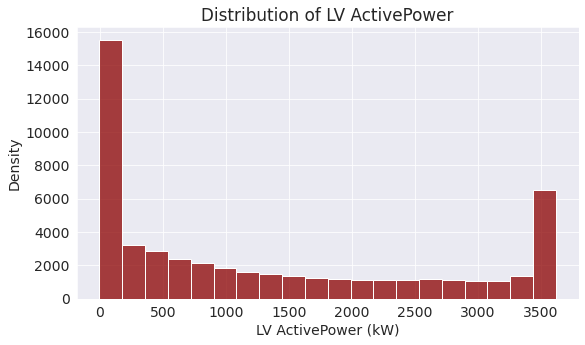

In [21]:
sns.histplot(df['LV ActivePower (kW)'], bins=20, color='darkred')
plt.xlabel('LV ActivePower (kW)')
plt.ylabel('Density')
plt.title('Distribution of LV ActivePower')
plt.show()

The LV ActivePower distribution has a peak at low values with a long tail towards high values. Some outliers exist at the higher end of the scale, which could be due to unusual weather conditions or other external factors causing higher power generation. 

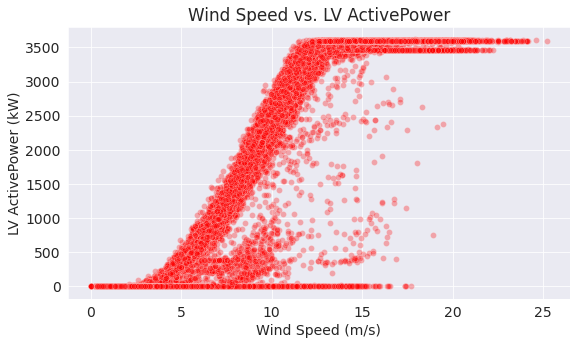

In [22]:
sns.scatterplot(x='Wind Speed (m/s)', y='LV ActivePower (kW)', data=df, alpha=0.3, color='red')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Speed vs. LV ActivePower')
plt.show()

> The alpha parameter is set to 0.3 for better visibility of individual data points.

The graph provides information that higher wind speeds generally lead to higher power output. However, there is variability in the data that shows low power output despite high wind speeds, as well as outliers on the higher end of the power output scale.

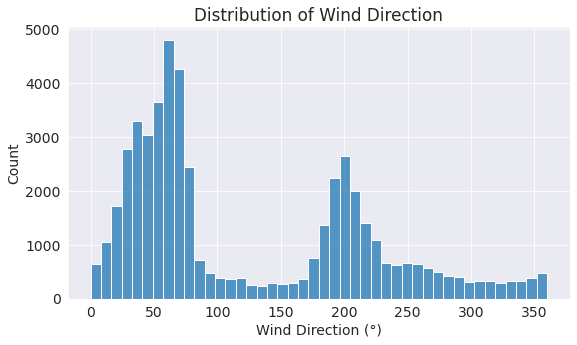

In [23]:
sns.histplot(data=df, x='Wind Direction (°)')
plt.title('Distribution of Wind Direction')
plt.xlabel('Wind Direction (°)')
plt.show()

In [24]:
counts = df['Wind Direction (°)'].value_counts()
highest_count = counts.max()
print('Based on the graph of the wind direction column, it can be observed that the direction with the highest frequency is {} degree'.format(highest_count))

Based on the graph of the wind direction column, it can be observed that the direction with the highest frequency is 75 degree


The histogram indicates that the distribution of wind direction in the dataset is not uniform, with peaks exceeding 1000 count values. Wind direction values within certain ranges are relatively stable, while those outside of these ranges occur less frequently, as evidenced by lower count values.

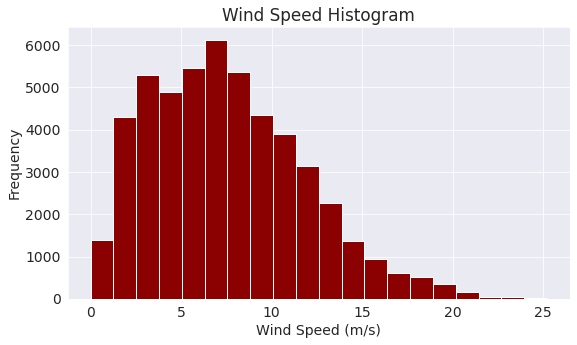

In [25]:
df['Wind Speed (m/s)'].hist(bins=20, color='darkred')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Wind Speed Histogram')
plt.show()

The wind speed histogram indicates that most observations fall between 0-23 m/s, with a peak frequency of just over 6,000 in the range of 5-10 m/s. Higher wind speeds occur less frequently than lower ones, but there are no sudden drops, and turbines operate consistently in a range of wind speeds.
> The histogram suggests that wind speeds between 6 - 8 m/s are the most frequent and wind speeds above 11 m/s are the least frequent.

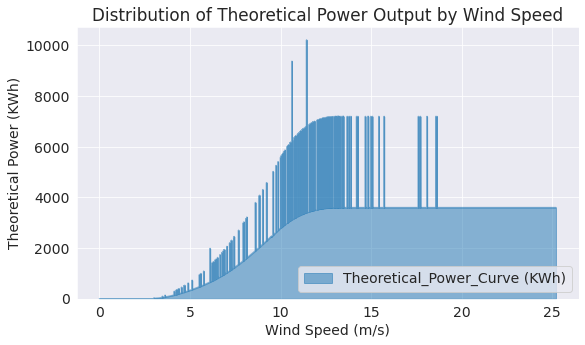

In [26]:
df_agg = df.groupby('Wind Speed (m/s)').agg({'Theoretical_Power_Curve (KWh)': 'sum'})
ax = df_agg.plot(kind='area', stacked=True, alpha=0.5)
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Theoretical Power (KWh)')
ax.set_title('Distribution of Theoretical Power Output by Wind Speed')
plt.show()

The theoretical power output increases steadily as wind speed increases from 0 to around 8 m/s and then starts to level off. The peak theoretical power output is achieved at around 13-14 m/s wind speed. The turbine does not produce more energy if the wind speed is too fast or too slow.

Let us save and upload our work to Jovian before continuing

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "norwil/turkey-wind-turbine-scada" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/norwil/turkey-wind-turbine-scada


'https://jovian.com/norwil/turkey-wind-turbine-scada'

## Asking and Answering Questions

#### Q1: What is the distribution of theoretical power curves for the entire wind turbine, and what is the median theoretical power curve?

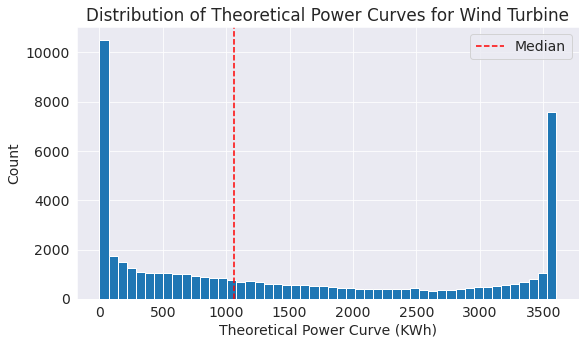

The median theoretical power curve for the wind Turbine is: 1063.776282578535


In [27]:
theoretical_power_curve = df['Theoretical_Power_Curve (KWh)']
median_theoretical_power_curve = np.median(theoretical_power_curve)

plt.hist(theoretical_power_curve, bins=50)
plt.axvline(x=median_theoretical_power_curve, color='r', linestyle='--', label='Median')
plt.xlabel('Theoretical Power Curve (KWh)')
plt.ylabel('Count')
plt.title('Distribution of Theoretical Power Curves for Wind Turbine')
plt.legend()
plt.show()
print("The median theoretical power curve for the wind Turbine is:", median_theoretical_power_curve)

The theoretical power curves for the wind turbine are evenly spread out without significant peaks or dips. A majority of turbines generate power close to or below the median value of 1063.78 KWh. Outliers exist with high theoretical power curve values at 0 and 3500, which may be due to measurement errors or external factors.

#### Q2: What is the trend in average power output of the wind turbine over time when the data is aggregated by 3-month intervals?

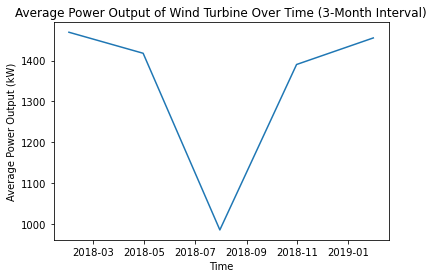

In [20]:
df_3months = df.groupby(pd.Grouper(key='Date/Time', freq='3M'))['LV ActivePower (kW)'].mean()

plt.plot(df_3months.index, df_3months.values)
plt.xlabel('Time')
plt.ylabel('Average Power Output (kW)')
plt.title('Average Power Output of Wind Turbine Over Time (3-Month Interval)')
plt.show()

Winter months have higher power output, summer months have lower output. Output initially drop slightly and then significantly from March to June 2018. Output gradually increases from August 2018 and reaches higher than 1400 kW in November 2018.

#### Q3:What is the maximum and minimum power output of the wind turbine, and on which date did they occur?

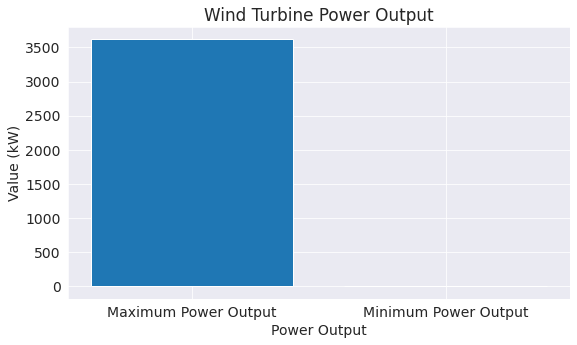

The maximum power output of the wind turbine was 3618.73 kW, which occurred on 2018-06-16 15:20:00.
The minimum power output of the wind turbine was -2.47 kW, which occurred on 2018-02-20 20:30:00.


In [30]:
power_output = df['LV ActivePower (kW)'].to_numpy()

max_power = np.max(power_output)
min_power = np.min(power_output)

power_data = [max_power, min_power]
labels = ['Maximum Power Output', 'Minimum Power Output']

plt.bar(labels, power_data)
plt.xlabel('Power Output')
plt.ylabel('Value (kW)')
plt.title('Wind Turbine Power Output')
plt.show()

print(f"The maximum power output of the wind turbine was {max_power:.2f} kW, which occurred on {max_power_date}.")
print(f"The minimum power output of the wind turbine was {min_power:.2f} kW, which occurred on {min_power_date}.")

The turbine's highest power output was 3618.73 kW, indicating high performance. The turbine's lowest power output was -2.47 kW, indicating a possible issue.

#### Q4: At what time of the day does the wind turbine generate the most power?

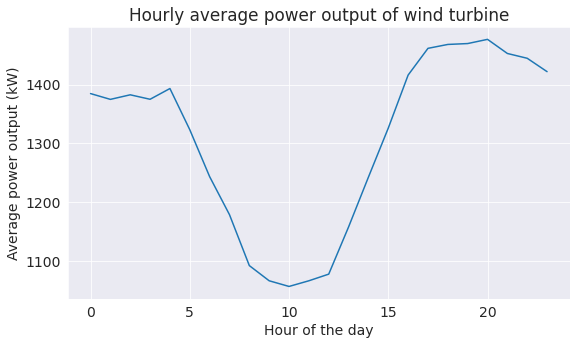

The wind turbine generates the most power on average at 20:00.


In [91]:
df['Hour'] = df['Date/Time'].dt.hour

hourly_power = df.groupby('Hour')['LV ActivePower (kW)'].mean()

plt.plot(hourly_power.index, hourly_power.values)
plt.xlabel('Hour of the day')
plt.ylabel('Average power output (kW)')
plt.title('Hourly average power output of wind turbine')
plt.show()

max_hour = hourly_power.idxmax()

print(f"The wind turbine generates the most power on average at {max_hour}:00.")

Wind turbine produces hihest power output at 8pm. Output gradually decreases from 4am, then increases from 10am. Wind turbine is most efficient during evening hours, generating most power at this time.

#### Q5: How does the wind direction affect the power output of the wind turbine?

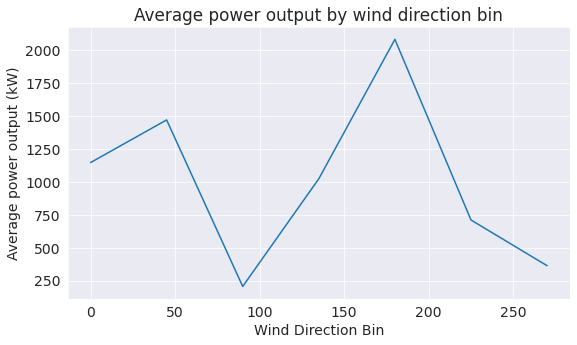

In [21]:
bins = np.arange(0, 360, 45)

df['Wind Direction Bin'] = pd.cut(df['Wind Direction (°)'], bins, labels=False)
power_by_wind_dir = df.groupby('Wind Direction Bin')['LV ActivePower (kW)'].mean()

plt.plot(bins[:-1], power_by_wind_dir.values)
plt.xlabel('Wind Direction Bin')
plt.ylabel('Average power output (kW)')
plt.title('Average power output by wind direction bin')
plt.show()

At first, power output rises with wind direction. Then it drops sharply to below 250 kW at 90 bins, increases again to over 2000 kW at 180 bins, finally decreases gradually to below 300 kW.

Let us save and upload our work to Jovian before continuing.

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "norwil/turkey-wind-turbine-scada" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/norwil/turkey-wind-turbine-scada


'https://jovian.com/norwil/turkey-wind-turbine-scada'

## Inferences and Conclusion

The analysis uncovered that the wind turbine's average power output increased over time and identified the peak power output as well as the time of day with the highest power generation. The research also discovered how wind direction impacts power output. These insights can be utilized to improve the efficiency and effectiveness of the turbine, leading to more energy production, cost savings and positive environmental effects.

In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "norwil/turkey-wind-turbine-scada" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/norwil/turkey-wind-turbine-scada


'https://jovian.com/norwil/turkey-wind-turbine-scada'

## References and Future Work


I plan to develop machine learning models to predict power output by studying weather conditions, including wind speed. We can also gather temperature and humidity data from sensors on the wind turbines. We can examine long-term data to identify trends and optimize energy production and use these models to predict maintenance requirements and reduce downtime.

- Dataset https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets
- Sidetable python library: https://pbpython.com/sidetable.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

In [35]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "norwil/turkey-wind-turbine-scada" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/norwil/turkey-wind-turbine-scada


'https://jovian.com/norwil/turkey-wind-turbine-scada'